I imported the following packages in order to:
- manipulate the dataframe
- create graphs to show my point
- make sure the graph were shown in this notebook

In [ ]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from statistics import mean, median, mode, stdev

Opened the csv file and made sure I could see a useful amount of data

In [2]:
with open('BankChurners.csv', newline='') as csvfile:
    bank_data = pd.read_csv('BankChurners.csv')

In [3]:
pd.options.display.max_rows = 500

In [4]:
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Changed the value labeled as **Unknown** to a null value to be removed when necesary.

In [5]:
bank_cleaned = bank_data.replace('Unknown', np.NaN)
bank_cleaned

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


I created graphs to compare the attrited and existing customers
The count for each is 1627 and 8500 respectively. This makes a ratio of .1914:1.


If the graph of the column showed this ratio throughout the graph, then the variables are independent of eachother.
I did further analysis using the columns that did not show this ratio throughout the graph.

In [118]:
# Number of rows with an Attrited Customer / Number of rows with an Existing Customer
(bank_cleaned.loc[bank_cleaned.Attrition_Flag == 'Attrited Customer'].shape[0])/(bank_cleaned.loc[bank_cleaned.Attrition_Flag == 'Existing Customer'].shape[0])

0.19141176470588236

In [7]:
# Fuction to create histograms comparing attrited and existing customers
def hist_v_attrit(column_name):
    # Removes null values from column being used
    bankcol_cleaned = bank_cleaned.dropna(subset=[column_name])
    # Creates histogram with only existing customers, including line for kernel density estimate
    sns.histplot(bankcol_cleaned.loc[bankcol_cleaned['Attrition_Flag']=='Existing Customer', column_name], 
                     label = 'Existing', kde = True)
    # Creates histogram with only attrited customers, including line for kernel density estimate
    sns.histplot(bankcol_cleaned.loc[bankcol_cleaned['Attrition_Flag']=='Attrited Customer', column_name], 
                 label = 'Attrited', kde = True,color='red').legend()

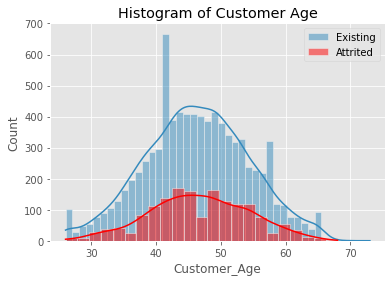

In [100]:
hist_v_attrit('Customer_Age')
plt.title('Histogram of Customer Age')
plt.savefig('hist_cust_age.png')

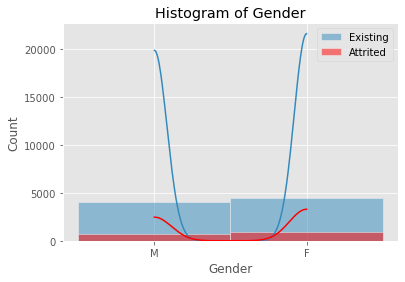

In [101]:
hist_v_attrit('Gender')
plt.title('Histogram of Gender')
plt.savefig('hist_gender.png')

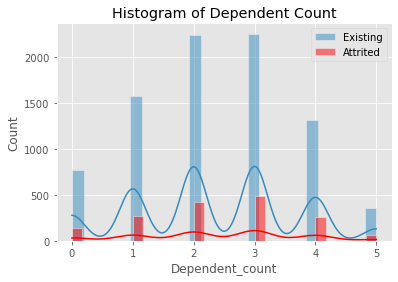

In [102]:
hist_v_attrit('Dependent_count')
plt.title('Histogram of Dependent Count')
plt.savefig('hist_dep_ct.png')

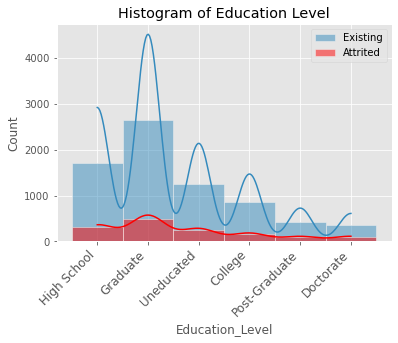

In [103]:
hist_v_attrit('Education_Level')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
    )
plt.title('Histogram of Education Level')
plt.savefig('hist_ed_lvl.png')

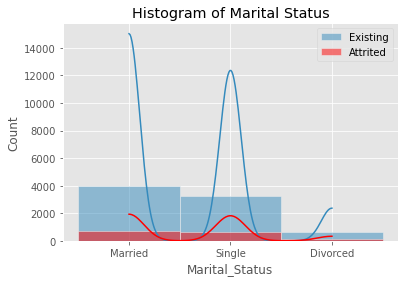

In [104]:
hist_v_attrit('Marital_Status')
plt.title('Histogram of Marital Status')
plt.savefig('hist_marital.png')

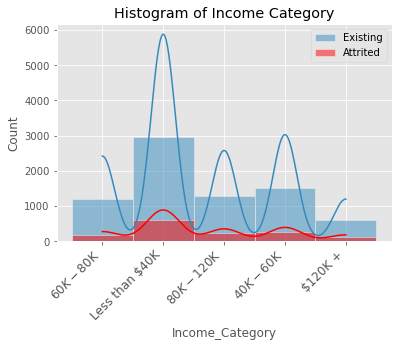

In [105]:
hist_v_attrit('Income_Category')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
    )
plt.title('Histogram of Income Category')
plt.savefig('hist_income.png')

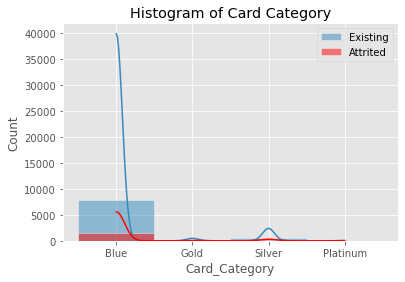

In [106]:
hist_v_attrit('Card_Category')
plt.title('Histogram of Card Category')
plt.savefig('hist_card_cat.png')

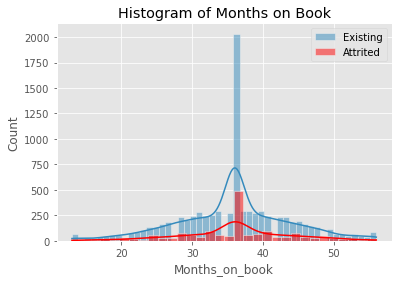

In [107]:
hist_v_attrit('Months_on_book')
plt.title('Histogram of Months on Book')
plt.savefig('hist_months_on_b.png')

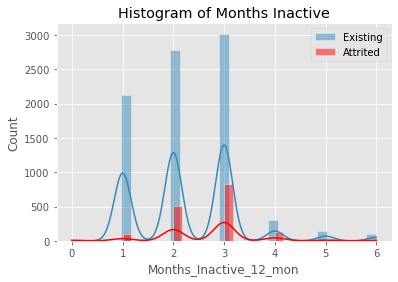

In [108]:
hist_v_attrit('Months_Inactive_12_mon')
plt.title('Histogram of Months Inactive')
plt.savefig('hist_mon_inactive.png')

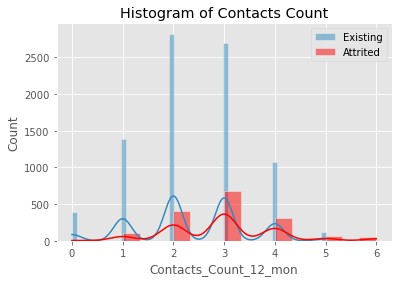

In [109]:
hist_v_attrit('Contacts_Count_12_mon')
plt.title('Histogram of Contacts Count')
plt.savefig('hist_contact_ct.png')

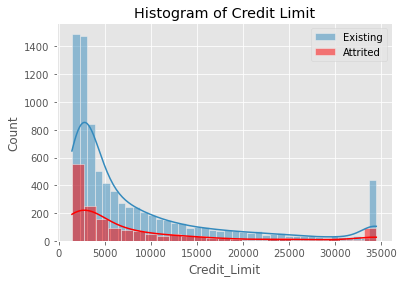

In [110]:
hist_v_attrit('Credit_Limit')
plt.title('Histogram of Credit Limit')
plt.savefig('hist_c_limit.png')

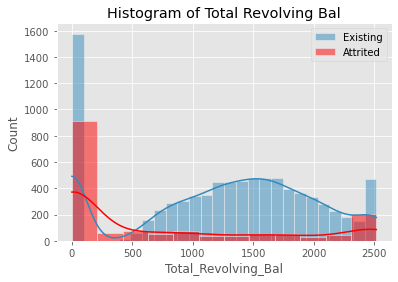

In [111]:
hist_v_attrit('Total_Revolving_Bal')
plt.title('Histogram of Total Revolving Bal')
plt.savefig('hist_rev_bal.png')

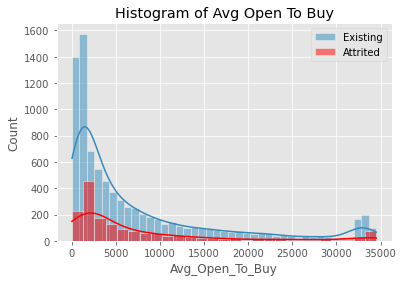

In [112]:
hist_v_attrit('Avg_Open_To_Buy')
plt.title('Histogram of Avg Open To Buy')
plt.savefig('hist_open_to_buy.png')

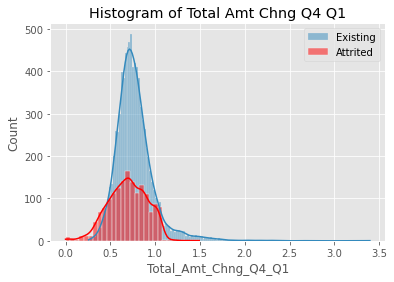

In [113]:
hist_v_attrit('Total_Amt_Chng_Q4_Q1')
plt.title('Histogram of Total Amt Chng Q4 Q1')
plt.savefig('hist_amt_change_q4q1.png')

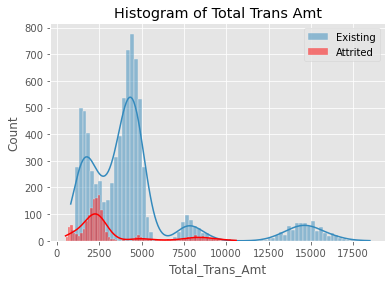

In [114]:
hist_v_attrit('Total_Trans_Amt')
plt.title('Histogram of Total Trans Amt')
plt.savefig('hist_trans_amt.png')

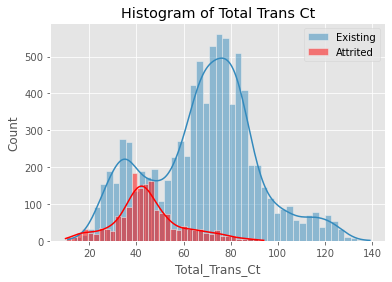

In [115]:
hist_v_attrit('Total_Trans_Ct')
plt.title('Histogram of Total Trans Ct')
plt.savefig('hist_trans_ct.png')

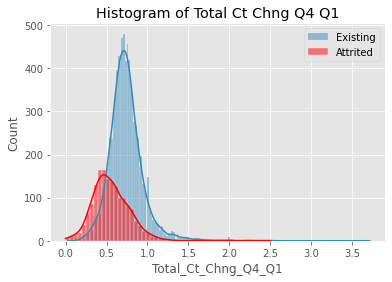

In [116]:
hist_v_attrit('Total_Ct_Chng_Q4_Q1')
plt.title('Histogram of Total Ct Chng Q4 Q1')
plt.savefig('hist_ct_change_q4q1.png')

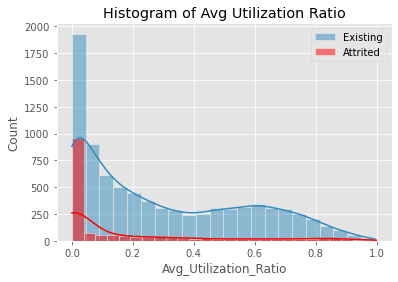

In [117]:
hist_v_attrit('Avg_Utilization_Ratio')
plt.title('Histogram of Avg Utilization Ratio')
plt.savefig('hist_util_ratio.png')

Graphs show that the columns that show a different trend when considering are:
- Total_Revolving_Bal
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1


I can confirm this by taking the count at the value for the attrited customer peak for both groups and getting the ratio.

In [26]:
attrit_data = bank_cleaned.loc[bank_cleaned.Attrition_Flag == 'Attrited Customer']
attrit_data[['Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']].aggregate([median, stdev], axis = 0)

,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
median,0.000000,0.701000,2329.000000,43.000000,0.531000
stdev,921.385582,0.214924,2308.227629,14.568429,0.226854


In each category, the people who close their accounts are most likely to:
- have a Total_Revolving_Bal of \$0
- Total_Amt_Chng_Q4_Q1 of .701
- have a Total_Trans_Amt of $2329
- have a Total_Trans_Ct of 43
- have a Total_Ct_Chng_Q4_Q1 of 0.531

This is further evidenced if we use scatterplots to compare the clusters between attrited and existing customers.

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


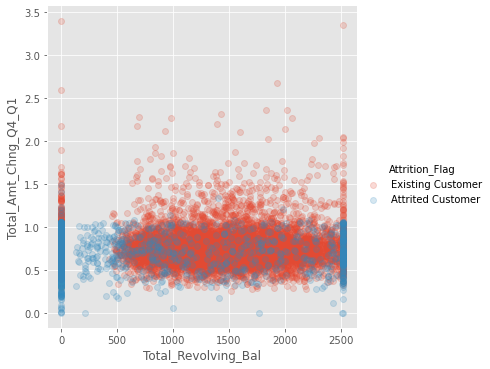

In [85]:
sns.lmplot('Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_01.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


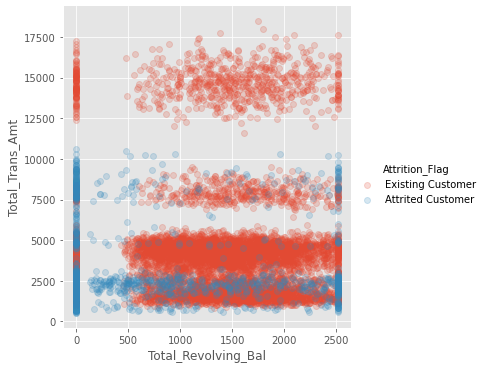

In [86]:
sns.lmplot('Total_Revolving_Bal', 'Total_Trans_Amt', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_02.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


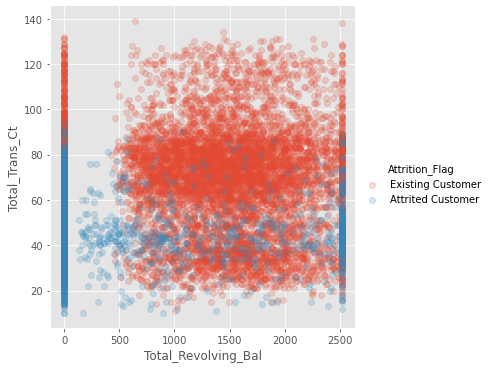

In [87]:
sns.lmplot('Total_Revolving_Bal', 'Total_Trans_Ct', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_03.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


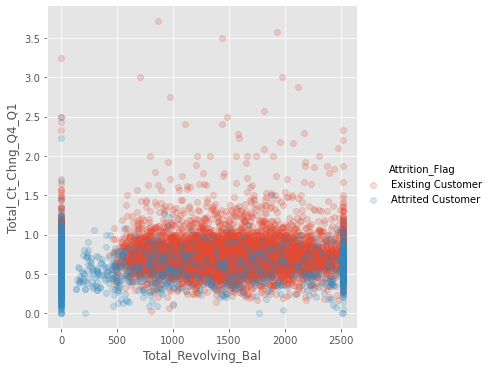

In [88]:
sns.lmplot('Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_04.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


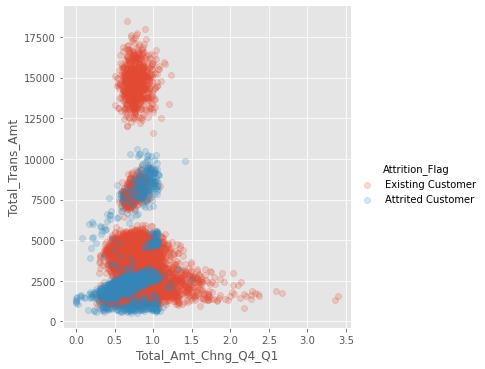

In [89]:
sns.lmplot('Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_05.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


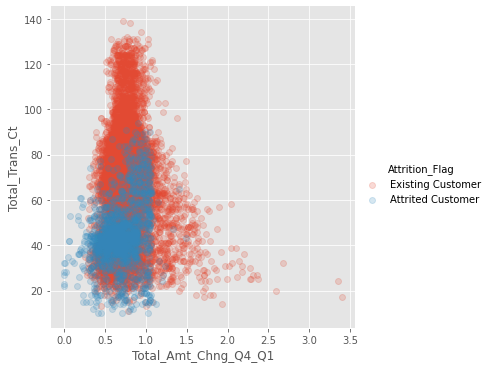

In [90]:
sns.lmplot('Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_06.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


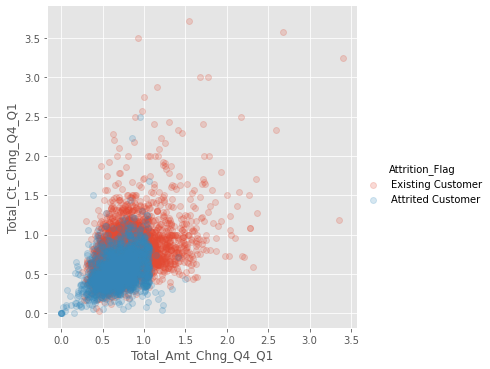

In [91]:
sns.lmplot('Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_07.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


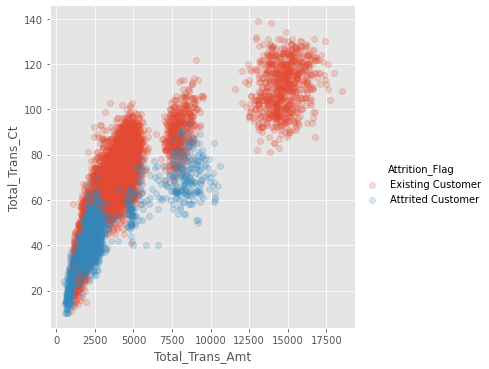

In [92]:
sns.lmplot('Total_Trans_Amt', 'Total_Trans_Ct', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_08.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


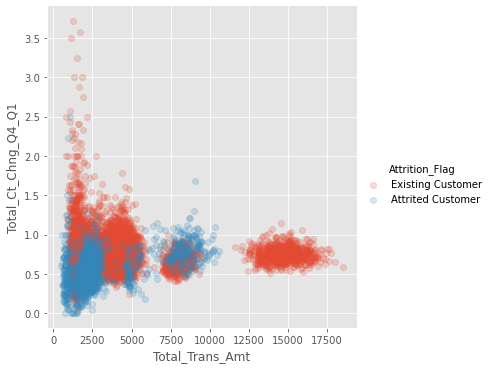

In [93]:
sns.lmplot('Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_09.png')

C:\Users\Nixon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


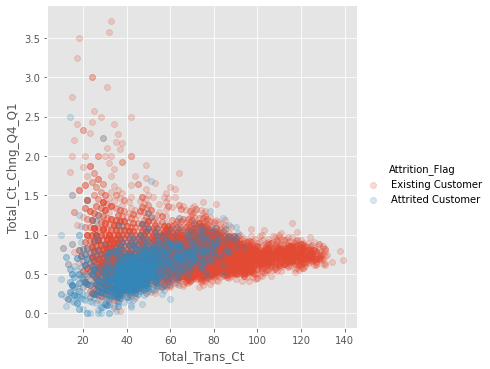

In [94]:
sns.lmplot('Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', bank_data, fit_reg = False, 
           hue='Attrition_Flag', scatter_kws = {'alpha':0.2})
plt.savefig('lmplot_10.png')

Using this information we can find existing customers that have a higher chance of cancelling their card.

In [37]:
exist_data = bank_cleaned.loc[bank_cleaned.Attrition_Flag == 'Existing Customer']
'''
Filters out rows that are with in coeff*standard deviation away from the median in the attrit_data
df: dataframe to be filtered
col_name: column in dataframe whose values the dateframe will be filtered by
coeff: narrows or widens the filter, at 1, it filters by values within 1 standard deviation.
'''
def filter_col(df, col_name, coeff):
    std_col = attrit_data[col_name].aggregate(stdev)
    med_col = attrit_data[col_name].aggregate(median)
    return (df.loc[df[col_name] < (med_col+(std_col*coeff))].
            loc[df[col_name] > (med_col-(std_col*coeff))])
    

In [38]:
# Filters through all the columns that attriting depend on.
might_attrit_data = exist_data
filter_cols = ['Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
for col in filter_cols:
    might_attrit_data = filter_col(might_attrit_data, col, .5)
might_attrit_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
306,710572458,Existing Customer,36,F,3,High School,Married,NaN,Blue,24,...,1,1,15439.0,0,15439.0,0.742,2069,43,0.536,0.0
308,721425558,Existing Customer,52,M,2,Graduate,Single,$120K +,Blue,37,...,3,2,14543.0,0,14543.0,0.788,1536,37,0.423,0.0
454,714900408,Existing Customer,41,F,4,High School,Single,Less than $40K,Blue,31,...,1,0,5773.0,0,5773.0,0.670,1306,39,0.500,0.0
670,709852908,Existing Customer,44,F,3,Uneducated,Single,Less than $40K,Blue,36,...,3,3,4307.0,0,4307.0,0.745,1628,37,0.542,0.0
884,715848408,Existing Customer,61,M,1,Graduate,NaN,$80K - $120K,Blue,52,...,6,1,8851.0,0,8851.0,0.731,1257,36,0.440,0.0
969,720611058,Existing Customer,40,M,3,Graduate,Single,$120K +,Blue,27,...,2,3,17018.0,0,17018.0,0.690,1550,47,0.621,0.0
1269,751487358,Existing Customer,39,F,3,Graduate,Married,Less than $40K,Blue,32,...,6,3,3221.0,0,3221.0,0.678,1765,40,0.600,0.0
1305,788210583,Existing Customer,62,M,0,College,Married,$40K - $60K,Blue,54,...,3,4,1438.3,0,1438.3,0.795,1843,49,0.581,0.0
1370,716355783,Existing Customer,36,M,3,NaN,Married,$60K - $80K,Blue,30,...,2,3,13080.0,0,13080.0,0.685,1999,44,0.571,0.0
1445,709986633,Existing Customer,29,M,1,High School,Married,$40K - $60K,Blue,36,...,1,3,1438.3,0,1438.3,0.742,2144,41,0.577,0.0


In [ ]:
attrit_data = bank_cleaned.loc[bank_cleaned.Attrition_Flag == 'Attrited Customer']

In [ ]:
attrit_data

In [ ]:
def crosstab_attrit(column):
    column_v_attrit = pd.crosstab(bank_data[column], bank_data['Attrition_Flag'])
    column_v_attrit['AttritPercent'] = column_v_attrit['Attrited Customer'] / (column_v_attrit['Attrited Customer'] + column_v_attrit['Existing Customer'])
    column_v_attrit['ExistPercent'] = column_v_attrit['Existing Customer'] / (column_v_attrit['Attrited Customer'] + column_v_attrit['Existing Customer'])
    return column_v_attrit

In [ ]:
cancelled_0intpaid = bank_data.loc[bank_data.Attrition_Flag == 'Attrited Customer'].loc[bank_data.Total_Revolving_Bal == 0]
cancelled_0intpaid['Avg_ActiveMon_Trans_Amt_in12Mon'] = cancelled_0intpaid['Total_Trans_Amt']/(12-cancelled_0intpaid['Months_Inactive_12_mon'])

In [ ]:
cancelled_0intpaid

In [ ]:
cancelled_0intpaid.loc[cancelled_0intpaid.Avg_ActiveMon_Trans_Amt_in12Mon < 120]

In [ ]:
plt.hist(cancelled_0intpaid['Avg_ActiveMon_Trans_Amt_in12Mon'],80)